### Original paper by Kronig, Penney:

R. de L. Kronig, W.G.Penney, Proc. Roy. Soc. (London) A130, 499 (1931)

In [23]:
import numpy as np
import scipy.linalg as la
import matplotlib.pylab as plt


### Solve an entire system of multiple wells
The technique heres appears to be a finite difference type method, i.e. approximate the second derivative in the 1D Schrodinger's equation with 2nd order accurate finite differences (central difference scheme). Then just diagonalize the matrix (this is what they call "exact diagonalization")

In [35]:
n_potentials = 20
dx = 0.1
steps_per_well = np.int(1. / dx)
potential_width = np.int(0.4 / dx)
n_x = np.int(n_potentials / dx)
V_0 = -100

V = np.zeros(n_x)

for i in range(n_potentials):
    left = i * steps_per_well
    right = i * steps_per_well + potential_width
    V[left:right] = V_0
print(V)

[-100. -100. -100. -100.    0.    0.    0.    0.    0.    0. -100. -100.
 -100. -100.    0.    0.    0.    0.    0.    0. -100. -100. -100. -100.
    0.    0.    0.    0.    0.    0. -100. -100. -100. -100.    0.    0.
    0.    0.    0.    0. -100. -100. -100. -100.    0.    0.    0.    0.
    0.    0. -100. -100. -100. -100.    0.    0.    0.    0.    0.    0.
 -100. -100. -100. -100.    0.    0.    0.    0.    0.    0. -100. -100.
 -100. -100.    0.    0.    0.    0.    0.    0. -100. -100. -100. -100.
    0.    0.    0.    0.    0.    0. -100. -100. -100. -100.    0.    0.
    0.    0.    0.    0. -100. -100. -100. -100.    0.    0.    0.    0.
    0.    0. -100. -100. -100. -100.    0.    0.    0.    0.    0.    0.
 -100. -100. -100. -100.    0.    0.    0.    0.    0.    0. -100. -100.
 -100. -100.    0.    0.    0.    0.    0.    0. -100. -100. -100. -100.
    0.    0.    0.    0.    0.    0. -100. -100. -100. -100.    0.    0.
    0.    0.    0.    0. -100. -100. -100. -100.   

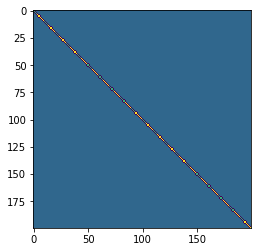

In [25]:
H = np.zeros((n_x, n_x))
np.fill_diagonal(H, 2 * 1 + dx * dx * V)
H = H + np.diag(-1 * np.ones(n_x - 1), -1) 
H = H + np.diag(-1 * np.ones(n_x - 1), +1) 

H[0, -1] = -1
H[-1, 0] = -1
plt.imshow(H);
plt.show();

In [26]:
evals, evecs = la.eigh(H)

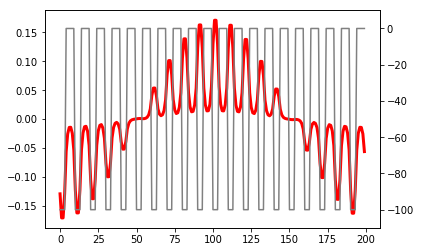

In [31]:
plt.plot(evecs[:, 2], color="red", linewidth=3, zorder=10)
ax_t = plt.twinx()
ax_t.plot(V, color="grey")
ax_t.set_ylim([V_0 * 1.1, np.abs(V_0)/10])
plt.show()

### Determination of the Bloch factors

In [7]:
dx = 0.01
steps_per_well = np.int(1. / dx)
potential_width = np.int(0.4 / dx)
n_x = 20

V_0 = 30
V = np.zeros(steps_per_well)
n_w = steps_per_well
B = np.zeros((n_w, n_w), dtype=np.complex)
ks = 1.j * np.linspace(-np.pi, np.pi, n_x)

for i in range(1):
    left = i * steps_per_well
    right = i * steps_per_well + potential_width
    V[left:right] = V_0

bnd_0 = []
bnd_1 = []
bnd_2 = []
bnd_3 = []

for k in ks:
    B[:] = 0. + 0.j
    
    np.fill_diagonal(B, +2 * 1 + dx * dx * (np.abs(k * k) + V))
    B = B + np.diag((-1 + k * dx) * np.ones(n_w - 1), -1)
    B = B + np.diag((-1 - k * dx) * np.ones(n_w - 1), +1)

    # periodic boundary conditions
    B[0, -1] = -1 + k * dx
    B[-1, 0] = -1 - k * dx
    
    evals, evecs = la.eigh(B)
    bnd_0.append(evals[0] / (dx * dx))
    bnd_1.append(evals[1] / (dx * dx))    
    bnd_2.append(evals[2] / (dx * dx))    
    bnd_3.append(evals[2] / (dx * dx))    

    

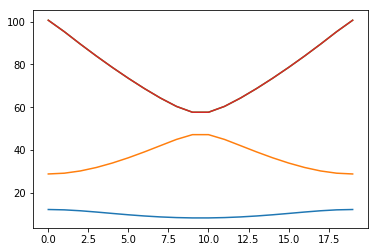

In [8]:
plt.plot(bnd_0)
plt.plot(bnd_1)
plt.plot(bnd_2)
plt.plot(bnd_3)
plt.show()

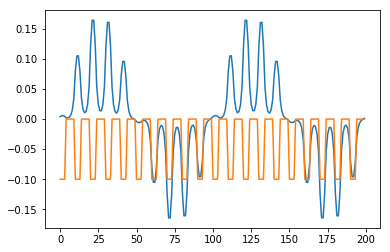

In [34]:
plt.plot(np.real(evecs[:, 4]))
plt.plot(V / 1000)
plt.show()

### Wannier functions from Kronig Penney functions

**Solve for the Bloch factors**

In [10]:
V_0 = 100
n_unit_cells = 20
a = 2.
dx = 0.1
steps_per_well = np.int(a / dx)
potential_width = np.int(0.2 / dx)

n_w = steps_per_well
V = np.zeros(steps_per_well)
B = np.zeros((n_w, n_w), dtype=np.complex)
ks = np.array([1.j * (-np.pi / a + 2 * np.pi / a / n_unit_cells * s) for s in range(n_unit_cells)])

boundary = np.int(potential_width / 2)
boundary = 2
V[0:boundary] = V_0
V[-boundary:] = V_0

evls = {}
evcs = {}

for nk, k in enumerate(ks):
    B[:] = 0. + 0.j
    
    np.fill_diagonal(B, 2 * 1 + dx * dx * (np.abs(k * k) + V))
    B = B + np.diag((-1 + k * dx) * np.ones(n_w - 1), -1)
    B = B + np.diag((-1 - k * dx) * np.ones(n_w - 1), +1)

    B[0, -1] = -1 + k * dx
    B[-1, 0] = -1 - k * dx
    
    evals, evecs = la.eigh(B)
    evls[nk] = evals / (dx * dx)
    evcs[nk] = evecs[:, 0]

**Build Bloch functions from Bloch factors**

In [11]:
psi_ungauged = np.zeros((n_unit_cells, n_unit_cells * steps_per_well), dtype=np.complex)

for nk in range(n_unit_cells):
    for nx in range(n_unit_cells):
        for i in range(steps_per_well):
            jx = nx * steps_per_well + i
            x = jx * dx
            psi_ungauged[nk, jx] = np.exp(ks[nk] * x) * evcs[nk][i] / np.sqrt(n_unit_cells)

**Gauge Bloch functions**

In [12]:
phases = np.zeros(n_unit_cells, dtype=np.complex)
for nk in range(n_unit_cells):
    phases[nk] = psi_ungauged[nk, 0] / np.abs(psi_ungauged[nk, 0])
    
psi_gauged = np.zeros((n_unit_cells, n_unit_cells * steps_per_well), dtype=np.complex)

for nk in range(n_unit_cells):
    psi_gauged[nk, :] = psi_ungauged[nk, :] / phases[nk]

 **Show the result**

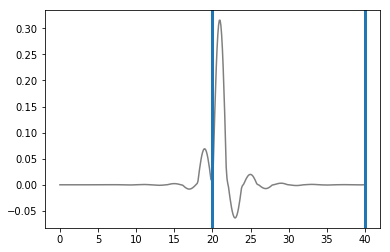

In [13]:
wannier = np.zeros(n_unit_cells * steps_per_well, dtype=np.complex)
i = 1

for jx in range(n_unit_cells * steps_per_well):
    for nk in range(n_unit_cells):
        wannier[jx] += np.exp(-ks[nk] * a * 10) * psi_gauged[nk, jx] / np.sqrt(n_unit_cells)
        
plt.plot(dx * np.arange(n_unit_cells * steps_per_well), np.real(wannier), color="grey")    
plt.axvline(x=i * steps_per_well, linewidth=3)
plt.axvline(x=(i + 1) * steps_per_well, linewidth=3)
# plt.xlim([10, 30])
plt.show()